# PAUTAS GENERALES


*   Contar la historia de sus datos
*   Comentar todas las celdas
*   Limpieza de datos
*   Graficas para el EDA
*   Análisis Univariado, Bivariado y Multivariado
*   Contruccion de modelos de clasificación
*   Evaluacion de modelos



# Conformación del equipo de trabajo.
###Gonzalo Villafañe
32 años, Tecnico Superior en Programación y futuro estudiante de la licenciatura de business Analytics en la escuela de Negocios ADEN.

# Presentación de la empresa, organización o problema específico.


Una empresa de viajes y tours turísticos ofrece paquetes de seguro a sus clientes. Actualmente la empresa está desarrollando un nuevo paquete de cobertura, debido a esto la compañía necesita saber qué clientes estarían interesados en comprarlo según el historial de su base de datos.

El seguro se ofreció a algunos de sus clientes en el año 2019 y los datos proporcionados se extrajeron del rendimiento / ventas del paquete durante ese período. Los datos recolectados son de casi 2000 de sus clientes y se requiere de un modelo estadístico que pueda predecir si el cliente estará interesado en comprar o no el paquete de seguro de viaje en función de ciertos parámetros.

# Preguntas y objetivos de la investigación.

Preguntas:
* ¿Que relaciones existen entre cada una de las variables? 
* ¿Cual es el nivel de importancia de cada variable en el resultado? 
* ¿El modelo brinda resultados relevantes o es preferible ofrecer el seguro a todos los clientes?

Objetivos:
* Realizar limpieza y filtrado de datos.
* Realizar el análisis exploratorio de datos para poder entender las variables y encontrar relaciones útiles para la implementación de estrategias de captación de nuevos clientes.
*Aplicar diferentes modelos de ML con la finalidad de predecir si un cliente determinado querrá comprar el paquete de seguros.


# Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

El dataset se denomina Travel Insurance Prediction Data. Clasifica con la variable "TravelInsurance", la cual se utilizará para predecir si un cliente determinado querrá comprar el paquete de seguros.

Link: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

En total tiene 9 columnas en los datos, las cuáles se describen a continuación:

* Age: Edad del cliente.
* Employment Type: El sector en el que está empleada el cliente.

* Graduate or Not: Si el cliente es graduado universitario o no.

* Annual Income: El ingreso anual del cliente en rupias indias.

* Family Members: Número de miembros en la familia del cliente.

* Chronic Disease: Si el cliente sufre de alguna enfermedad o condición importante como diabetes, presión arterial alta o asma, etc.

* Frequent Flyer: Indica si el cliente ha realizado al menos cuatro viajes a diferentes locaciones en los últimos dos años (2017-2019).

* Ever Travelled Abroad: Indica si el cliente ha realizado alguna vez un viaje a un país extranjero.

* Travel Insurance: ¿El cliente compró un paquete de seguro de viaje durante la oferta de lanzamiento celebrada en el año 2019?.




# Data wrangling. Filtros aplicados a los datos. Distribución. Dataset final para analizar.

*Importamos  las librerias que vamos a utilizar para nuestro analisis.* 


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import catboost as ctb
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

###Importamos el archivo csv llamado Travellnsurance.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


*No contiene ninguna columna con registros nulos, desconocidos, indefinido o no inicializado.*

###Verificamos  los valores unicos de cada columna de tipo object

In [ ]:
objets = df.select_dtypes(include = ["object"])
for i in objets:
    unicos = df[i].unique()
    print('valores únicos de la columna ' +i )
    print(unicos)
    print()

valores únicos de la columna Employment Type
['Government Sector' 'Private Sector/Self Employed']

valores únicos de la columna GraduateOrNot
['Yes' 'No']

valores únicos de la columna FrequentFlyer
['No' 'Yes']

valores únicos de la columna EverTravelledAbroad
['No' 'Yes']



*Los valores de las variables objects solo tienen 2 valores que pueden ser modificados por 0 y 1.*

##Data wrangling

* Eliminamos la columna que tiene los índices por no ser relevante en el análisis. 

* Cambiamos a valor bool (0,1) a las columnas con solamente 2 valores. En el caso de 'Employment Type', elijo a 'Government Sector' como identificador de la columna y coloco 0 o 1 en los respectivos casos. 

* Creamos una nueva variable "AnnualincomePercapita" que será el ingreso anual dividido los miembros de familia. Analizaremos su impacto en el modelo.

In [ ]:
df.drop(columns='Unnamed: 0', inplace= True)
df = df.replace({'Yes': 1, 'No': 0})
df = df.rename(columns={"Employment Type": "Government Sector"})
df = df.replace({'Government Sector': 1, 'Private Sector/Self Employed': 0})
df['AnnualincomePercapita'] = round(df['AnnualIncome']/df['FamilyMembers'],3)
df.head()

,Age,Government Sector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualincomePercapita
0,31,1,1,400000,6,1,0,0,0,66666.667
1,31,0,1,1250000,7,0,0,0,0,178571.429
2,34,0,1,500000,4,1,0,0,1,125000.000
3,28,0,1,700000,3,1,0,0,0,233333.333
4,28,0,1,700000,8,1,1,0,0,87500.000


*Con el comando dtypes podemos visualizar los tipos datos de cada columna*

In [ ]:
df.dtypes

Age                        int64
Government Sector          int64
GraduateOrNot              int64
AnnualIncome               int64
FamilyMembers              int64
ChronicDiseases            int64
FrequentFlyer              int64
EverTravelledAbroad        int64
TravelInsurance            int64
AnnualincomePercapita    float64
dtype: object

Descripción del dataframe

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.000,28.0,29.0,32.000,35.0
Government Sector,1987.0,0.286865,0.452412,0.000,0.0,0.0,1.000,1.0
GraduateOrNot,1987.0,0.851535,0.355650,0.000,1.0,1.0,1.000,1.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.000,600000.0,900000.0,1250000.000,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.000,4.0,5.0,6.000,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.000,0.0,0.0,1.000,1.0
FrequentFlyer,1987.0,0.209864,0.407314,0.000,0.0,0.0,0.000,1.0
EverTravelledAbroad,1987.0,0.191243,0.393379,0.000,0.0,0.0,0.000,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.000,0.0,0.0,1.000,1.0
AnnualincomePercapita,1987.0,221469.082767,125685.960608,33333.333,130000.0,200000.0,283333.333,875000.0


# Generación del EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

##Univariado
*El propósito del análisis univariado es comprender la distribución de valores para una sola variable.*

###Gráfico de barras sobre la variable: 'Age' 

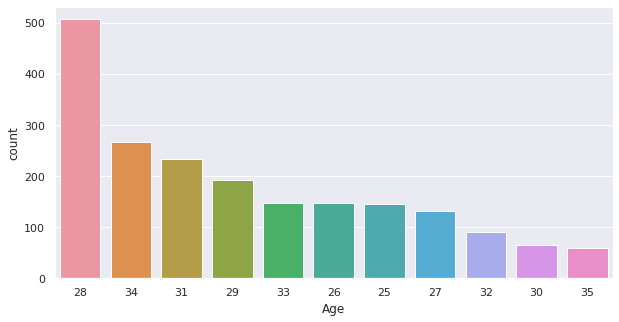

In [ ]:

sns.set(rc = {'figure.figsize':(10,5)})
sns.countplot(x=df['Age'], order= df['Age'].value_counts().index)

*Muestra el rango de edades con las que cuenta el dataset y la cantidad de cada una de ellas. Existe un maximo numero de clientes de 28 años*

###Gráfico de líneas de la variable: 'FamilyMembers'

FamilyMembers
2     93
3    377
4    505
5    426
6    294
7    178
8     59
9     55
Name: FamilyMembers, dtype: int64


Text(5.334999999999994, 0.5, 'Frefuencia')

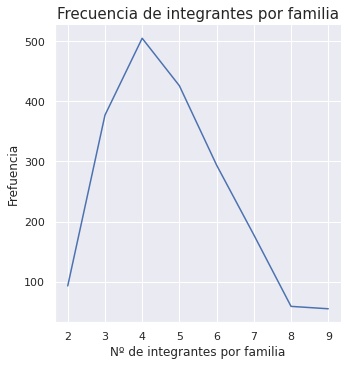

In [ ]:
#Reporte
grouped = df['FamilyMembers'].groupby(df['FamilyMembers'])
print(grouped.count())

#Grafico
new = df.FamilyMembers.value_counts().sort_index()
sns.relplot(x = new.index, y = new.values, data = new, kind = "line")
plt.title('Frecuencia de integrantes por familia',fontdict={'fontsize':15})
plt.xlabel('Nº de integrantes por familia',fontdict={'fontsize':12})
plt.ylabel('Frefuencia',fontdict={'fontsize':12})

*Vemos que el maximo numero de clientes en nuestro dataset tiene 4 miembros de familia.* 

Hacemos un grafico de violin para verificar la distribucion.

###Grafico de Violin Family members

5.0

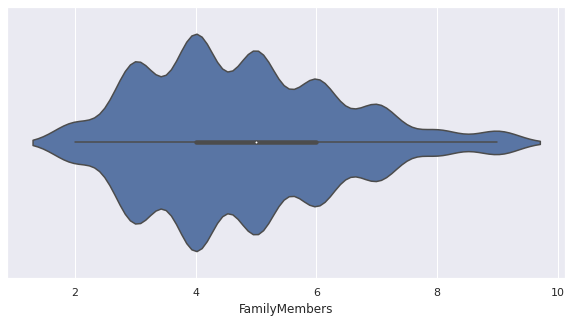

In [ ]:
sns.violinplot(x=df.FamilyMembers)
np.median(df.FamilyMembers)

*Podemos ver la distribucion de miembros de familia de los clientes. Con una mediana de 5.*

###Histograma de la variable: 'AnnualIncome'

Text(0, 0.5, 'Frefuencia')

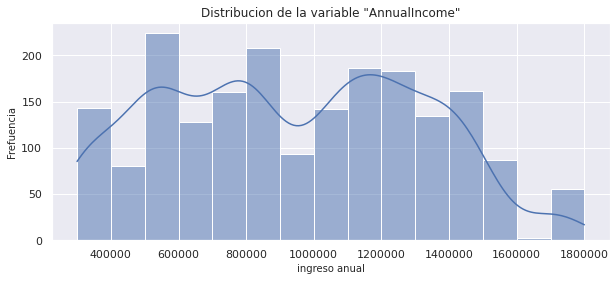

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x="AnnualIncome", kde= True)
plt.ticklabel_format(style='plain', axis='x')#Mantener el valor real y no en notacion cientifica
plt.title('Distribucion de la variable "AnnualIncome"',fontdict={'fontsize':12})
plt.xlabel('ingreso anual',fontdict={'fontsize':10})
plt.ylabel('Frefuencia',fontdict={'fontsize':10}) 

*Aca se pueden analizar los ingresos de los clientes de nuestro dataset. Es una variable importante a analizar posteriormente en conjunto con el target de clasificación.*

Frecuencia absoluta, la absoluta acumulada, la frecuencia relativa y relativa acumulada para la variable: TravelInsurance.

In [ ]:
frec = df["TravelInsurance"].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={'TravelInsurance':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.TravelInsurance),4)
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para  sumarlas
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,1277,1277,64.2677,64.2677
1,710,1987,35.7323,100.0000


*Sobre la variable Target podemos ver que existen un desbalanceo entre aquellos clientes que compraron el paquete de seguro de viaje y los que no. Algo a tener en cuenta cuando se trabaje con algoritmos de clasificacion.*

##Bivariado

*El análisis bivariado puede ayudar a determinar en qué medida es posible predecir el valor de una variable en el caso en que conozcamos el valor de otra variable.*

*La libreria de Pandas Profiling  es un módulo de Python de código abierto con el que podemos hacer rápidamente un análisis de datos exploratorio con solo unas pocas líneas de código.*

In [ ]:
!pip uninstall pandas_profiling --quiet

Proceed (y/n)? y


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --quiet

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile

*Profiling*: Un dato interesante obtenido del profiling, es que, salvo 'ChronicDiseases', las variables presentan alta correlación con una y o mas variables de la muestra.

##Matriz de correlacion entre variables

*La matriz de correlación muestra los valores de correlación de Pearson, que miden el grado de relación lineal entre cada par de elementos o variables. Los valores de correlación se pueden ubicar entre -1 y +1. Sin embargo, en la práctica, los elementos por lo general tienen correlaciones positivas.*

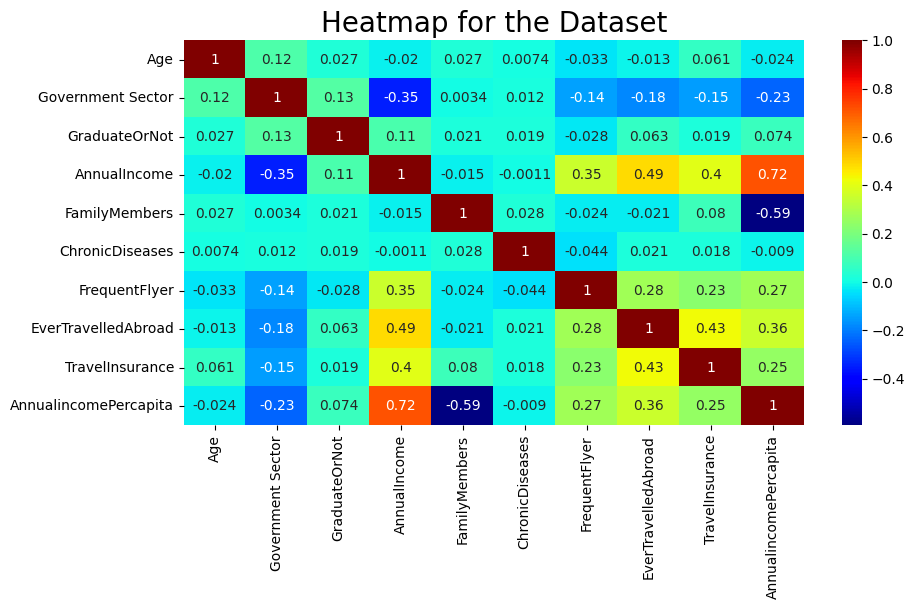

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

sns.heatmap(df.corr(), annot = True, cmap = 'jet')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

###Gráficos para analizar la relacion de 'Age' y 'TravelInsurance'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


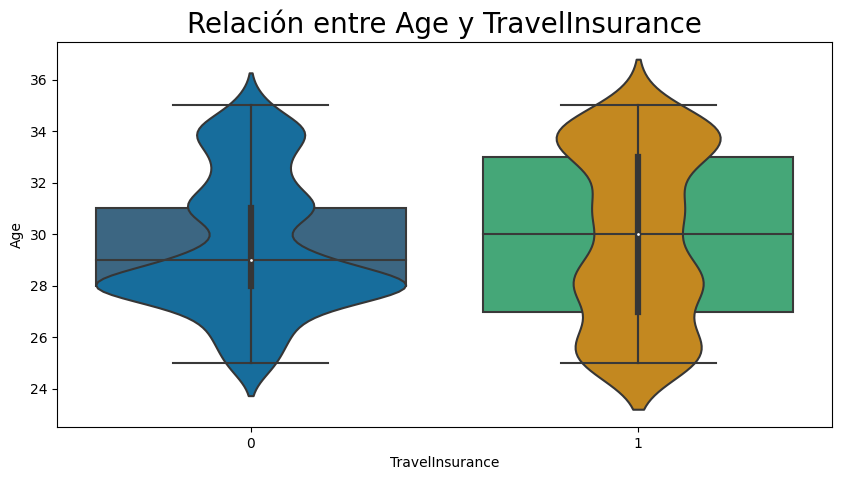

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot( df["TravelInsurance"],df["Age"], palette = 'viridis')
plt.title('Relación entre Age y TravelInsurance', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(df["TravelInsurance"],df["Age"], palette = 'colorblind')
plt.title('Relación entre Age y TravelInsurance', fontsize = 20, fontweight = 30)
plt.show()

*'Age' y 'TravelInsurance': Las graficas nos comunican que la mediana de edad de los clientes que compran el seguro es un poco mas alta que la de los clientes que no. Tambien podemos observar que, a pesar de lo mencionado, las edades de clientes que compran el seguro está mas distribuida "uniformemente"*


###Gráfico para analizar la relacion de 'AnnualIncome' y 'TravelInsurance'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relación entre AnnualIncome y TravelInsurance')

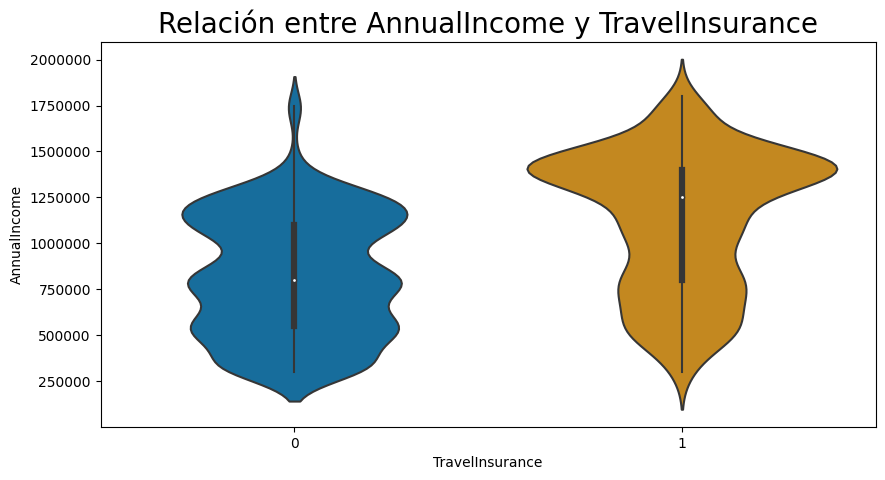

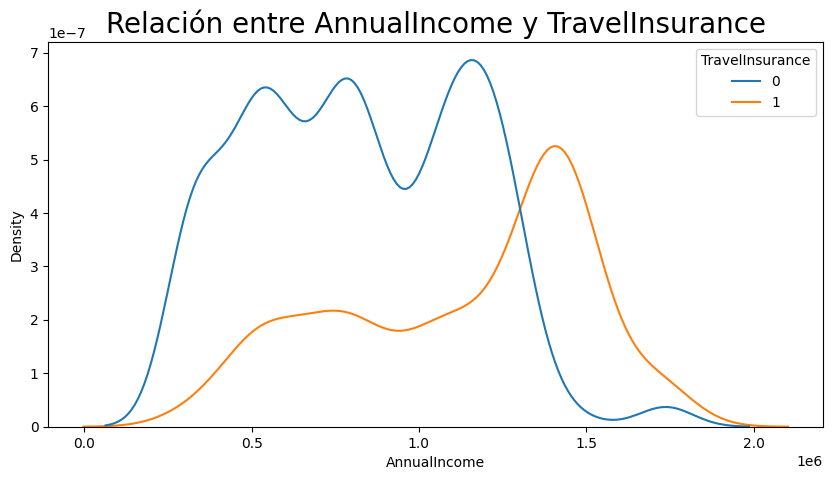

In [ ]:

sns.violinplot(df["TravelInsurance"],df["AnnualIncome"], palette = 'colorblind')
plt.title('Relación entre AnnualIncome y TravelInsurance', fontsize = 20, fontweight = 30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(df['AnnualIncome'], hue= df['TravelInsurance'])
plt.title('Relación entre AnnualIncome y TravelInsurance', fontsize = 20, fontweight = 30)

*'AnnualIncome' y 'TravelInsurance': Vemos que existen más clientes con mayor ingreso anual que compran el seguro de viaje.*

###Gráficos para analizar la relacion de 'FamilyMembers' y 'TravelInsurance'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TravelInsurance
0    4.0
1    5.0
Name: FamilyMembers, dtype: float64

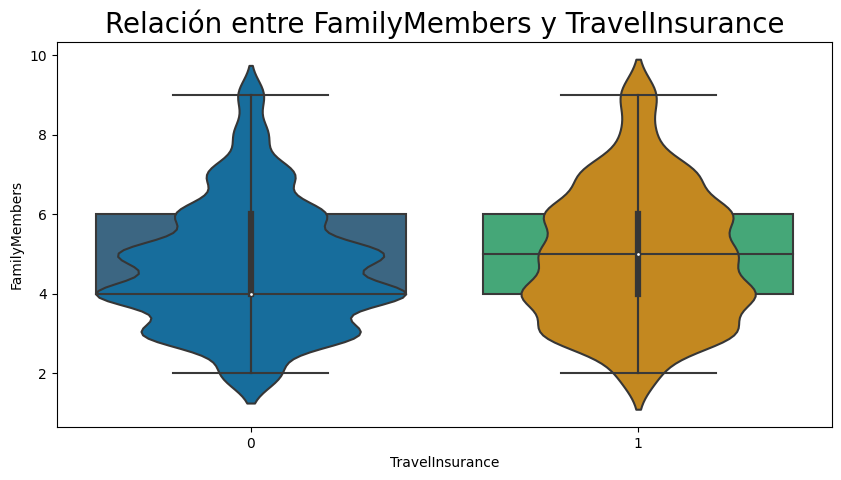

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot( df["TravelInsurance"],df["FamilyMembers"], palette = 'viridis')
plt.title('Relación entre FamilyMembers y TravelInsurance', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(df["TravelInsurance"],df["FamilyMembers"], palette = 'colorblind')
plt.title('Relación entre FamilyMembers y TravelInsurance', fontsize = 20, fontweight = 30)
plt.show()

familia = df['FamilyMembers'].groupby(df['TravelInsurance']).median()
familia

*'FamilyMembers' y 'TravelInsurance': Las graficas nos comunican que la mediana de miembros de familia de los clientes que compran el seguro es un poco mas alta que la de los clientes que no.* 


     TravelInsurance     Mediana
            0              4.0
            1              5.0

###Gráfico para analizar la relacion de clientes con enfermedades crónicas y, a la vez, viajeros frecuentes

1    60
0    40
Name: TravelInsurance, dtype: int64

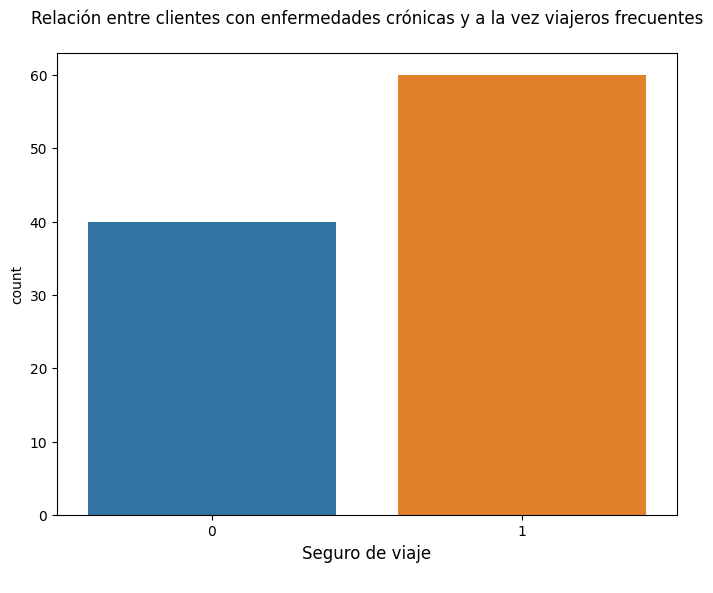

In [ ]:
cdff = df[(df['FrequentFlyer']==1)&(df['ChronicDiseases']==1)]
plt.figure(figsize=(8,6))
sns.countplot(x = cdff['TravelInsurance'])
plt.title('Relación entre clientes con enfermedades crónicas y a la vez viajeros frecuentes\n', fontdict={'fontsize':12})
plt.xlabel('Seguro de viaje\n', fontdict={'fontsize':12})
cdff['TravelInsurance'].value_counts()

*FrequentFlyer y ChronicDiseases: Si bien, solo 100 personas cumplen con estas caracteristicas, representando un 5,03% del total de la muestra, podemos ver que el 60% de estos si contrata seguro de viaje.*

###Relación entre sector de trabajo y la adquisición de un seguro de viaje.

In [ ]:
tipotrabajo = df.groupby([df['Government Sector'],df['TravelInsurance']])['Government Sector'].count()
tipotrabajo.groupby(level=0).apply(lambda x: round((100 * x / x.sum()), 2))

Government Sector  TravelInsurance
0                  0                  59.77
                   1                  40.23
1                  0                  75.44
                   1                  24.56
Name: Government Sector, dtype: float64

In [ ]:
TOTAL = len(df)

In [ ]:
tipotrabajo = df.groupby([df['Government Sector'],df['TravelInsurance']])['Government Sector'].count()
tipotrabajo.groupby(level=0).apply(lambda x: round((100 * x /TOTAL), 2))

Government Sector  TravelInsurance
0                  0                  42.63
                   1                  28.69
1                  0                  21.64
                   1                   7.05
Name: Government Sector, dtype: float64

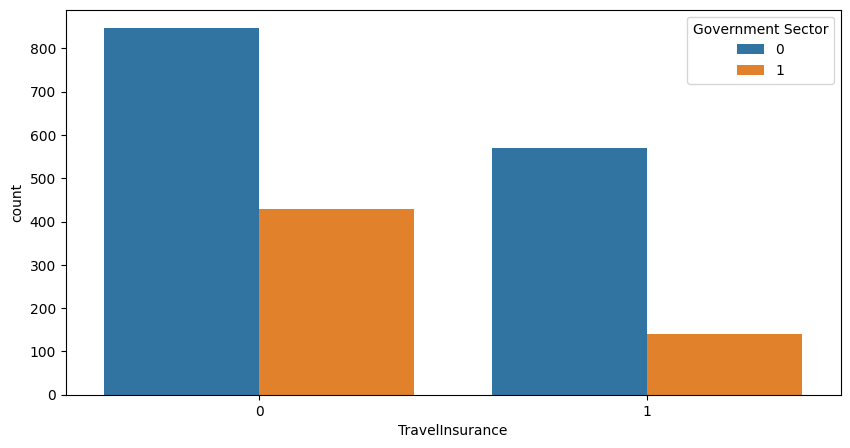

In [ ]:
sns.countplot(x=df['TravelInsurance'], hue= df['Government Sector'])

 *Government Sector y TravelInsurance: Podemos ver que un 40,23% de los trabajadores del sector privado contrataron un seguro de viajes, representando un 28,69% del total, mientras que, de los trabajadores del sector gobierno, solo un 24,56% contrató este servicio, representando un 7,05% del total de la muestra.*

###Analizamos la relacion entre FamilyMembers y AnnualIncome

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


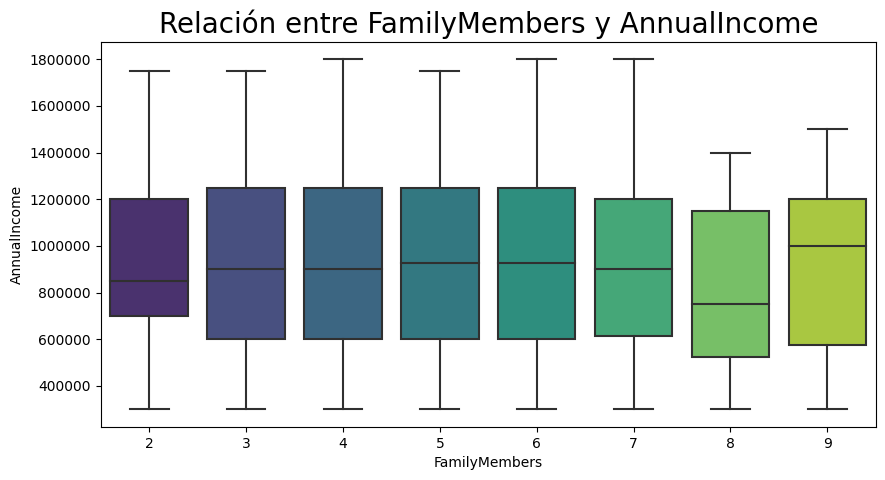

In [ ]:
sns.boxplot( df["FamilyMembers"],df["AnnualIncome"], palette = 'viridis')
plt.title('Relación entre FamilyMembers y AnnualIncome', fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

*FamilyMembers y AnnualIncome: Para clientes que cuentan con 8 miembros de familia la mediana del ingreso anual es la más baja de todas. Con 9 miembros de familia la situacion cambia,  de pronto la mediana es la mas alta de todas las demás.*

###Analizamos la relacion entre Age y AnnualIncome

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Age
25     7.35
26     7.45
27     6.59
28    25.47
29     9.66
30     3.27
31    11.78
32     4.58
33     7.45
34    13.39
35     3.02
Name: Age, dtype: float64

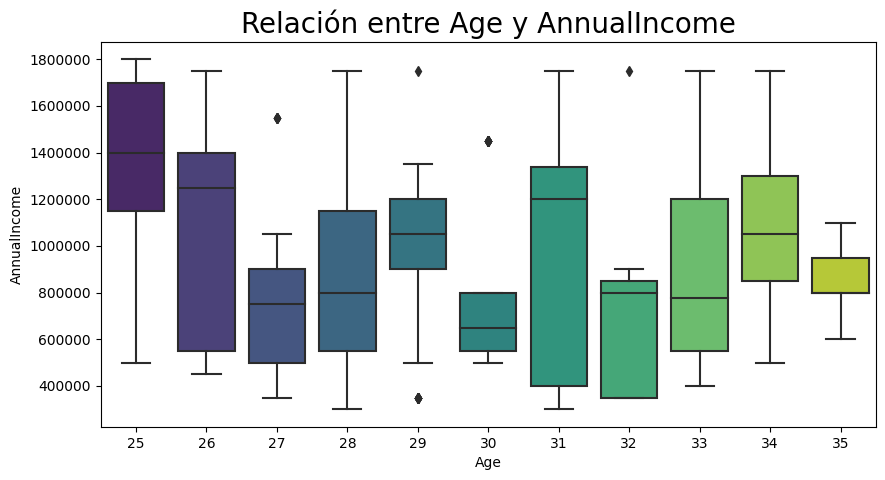

In [ ]:
sns.boxplot( df["Age"],df["AnnualIncome"], palette = 'viridis')
plt.title('Relación entre Age y AnnualIncome', fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

edades = df.groupby([df['Age']])['Age'].count()
edades.groupby(level=0).apply(lambda x: round((100 * x /TOTAL), 2))

*Age y AnnualIncome: Podemos observar el rango del ingreso anual de los clientes segun su edad, siendo los 25 años la edad que posee la media mas alta y los 30 años la media mas baja, representando un 7,35% y 3,27% del total de la muestra respectivamente.*

##Multivariado

*
El propósito del análisis multivariante es medir, explicar y predecir el grado de relación que existe entre la variación (combinación lineal ponderada de las variables). El carácter multivariante del análisis descansa no sólo en el número de variables sino en las múltiples combinaciones existente entre las variables.*

Creamos un Pairplot del dataset teniendo en cuenta el target de clasificación

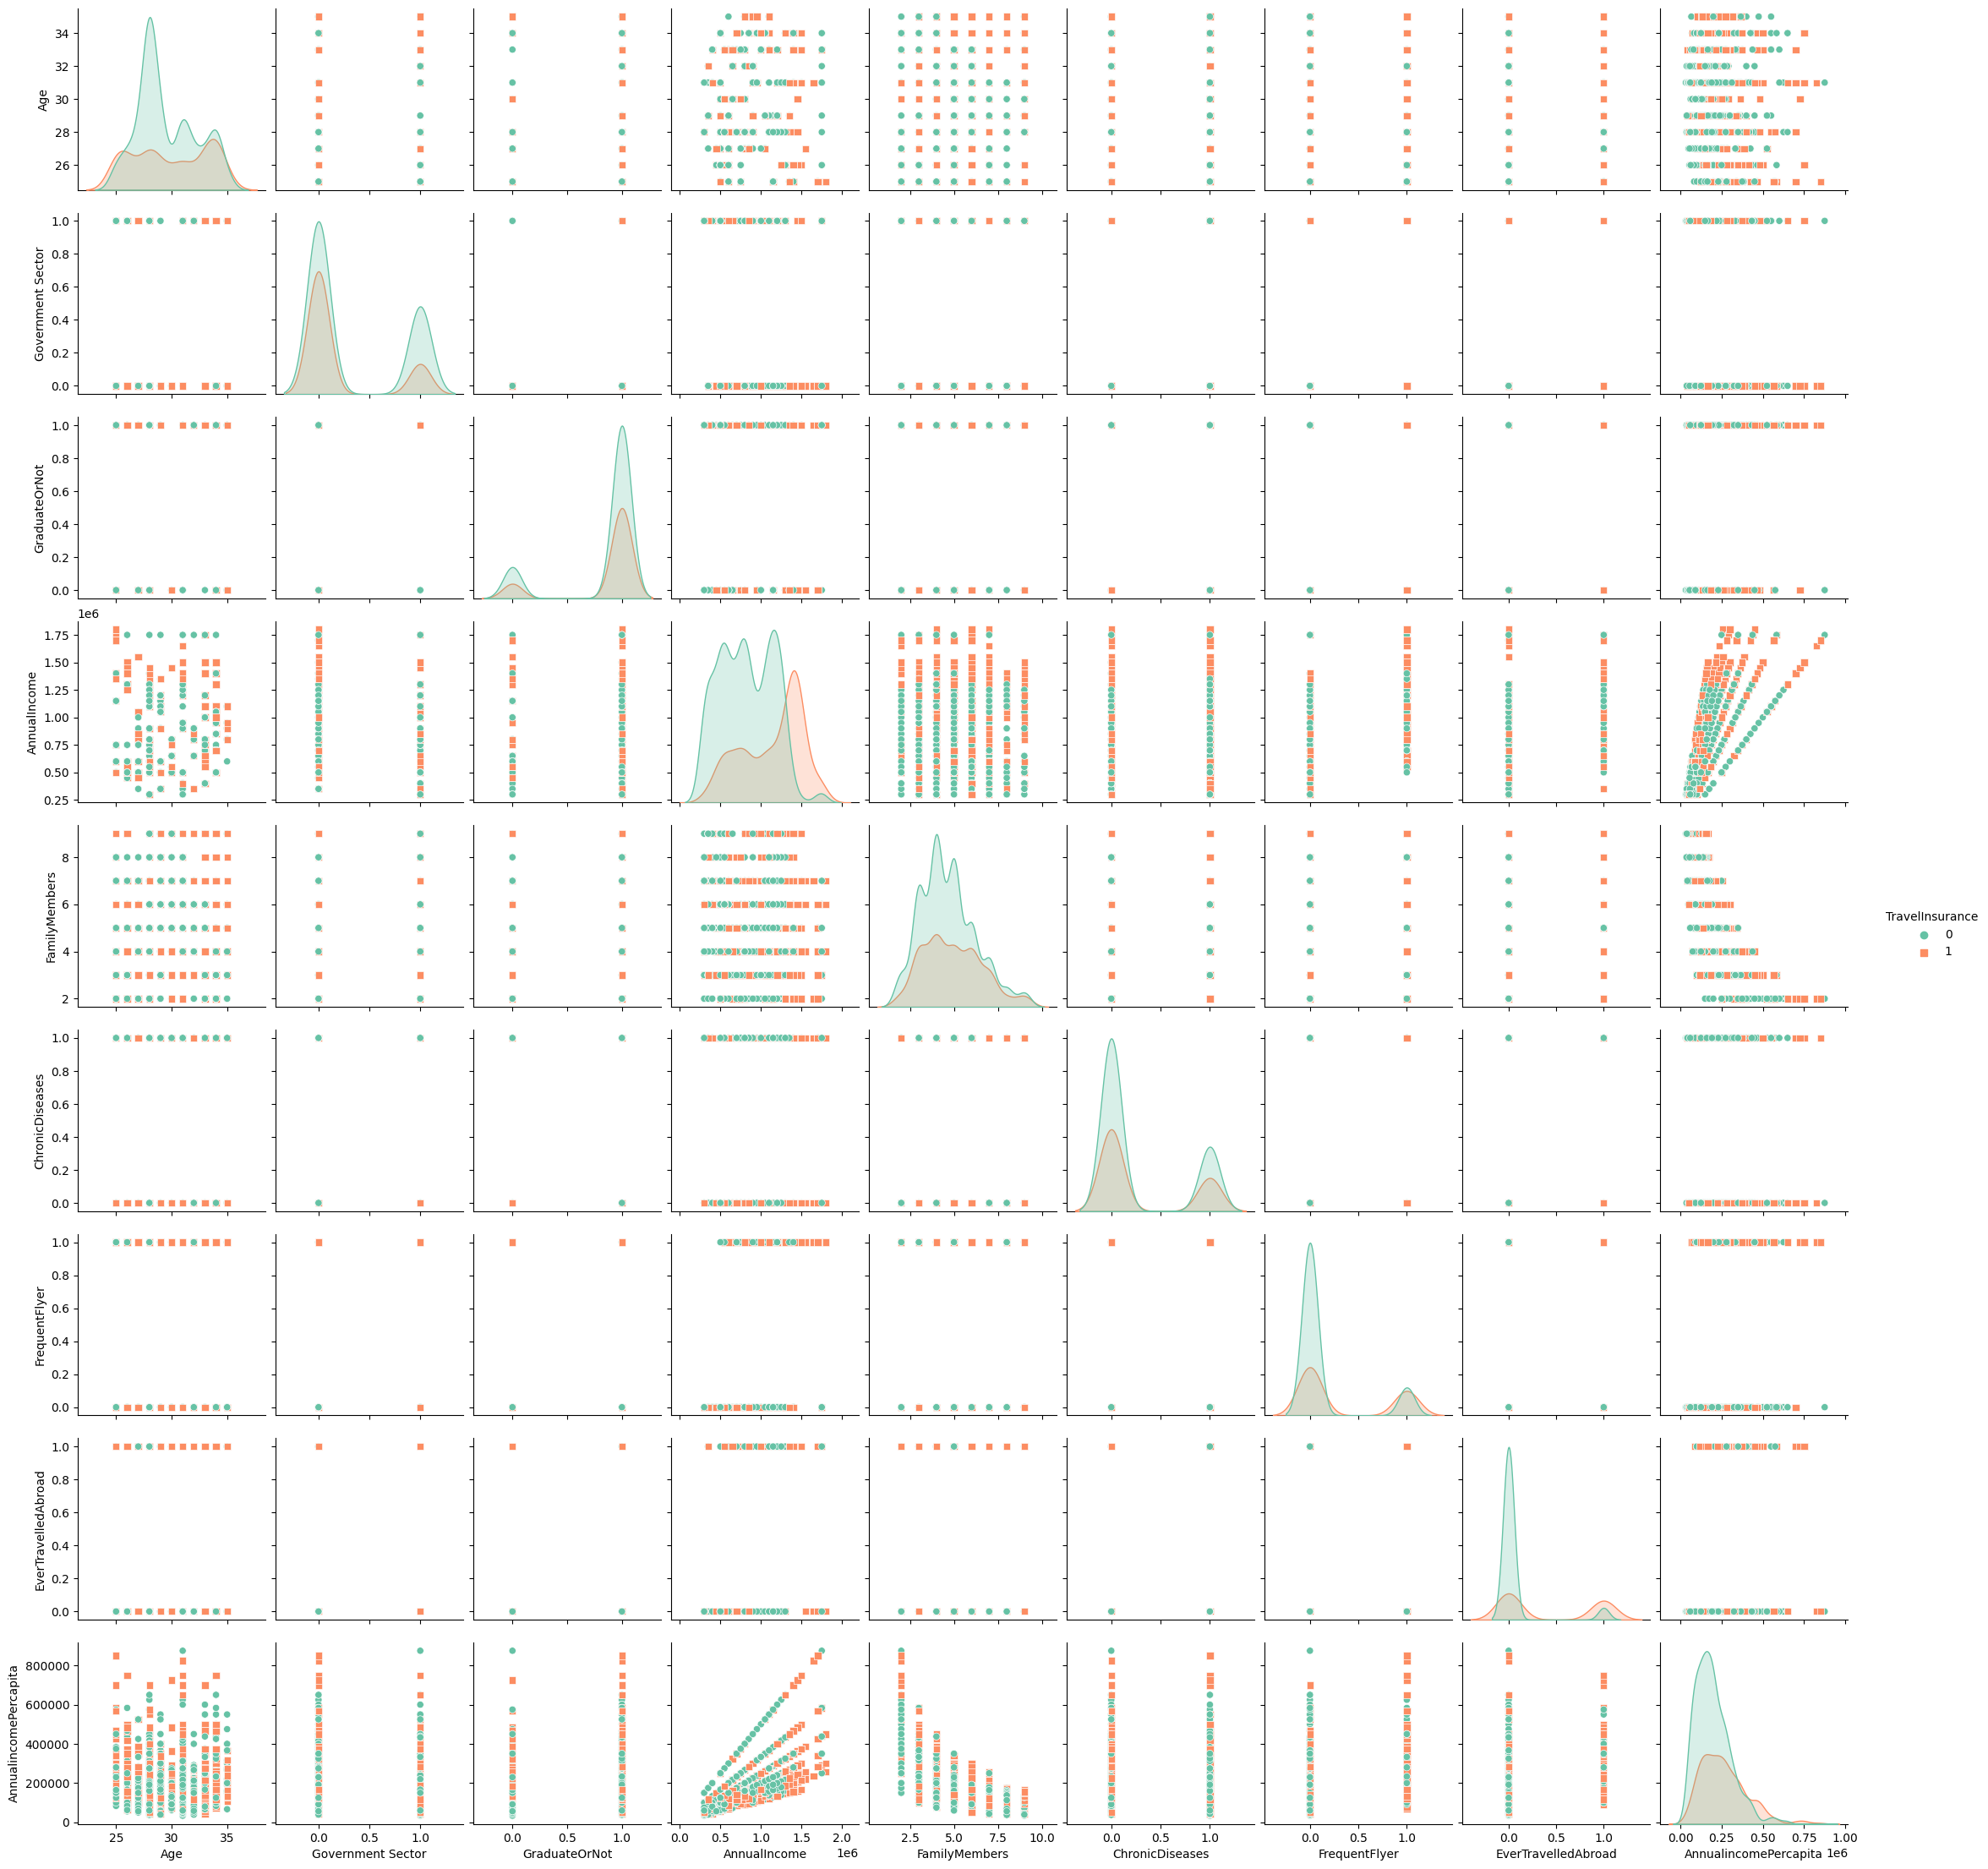

In [ ]:
sns.pairplot(df,hue = 'TravelInsurance' ,  palette = 'Set2',markers=["o", "s"])
plt.show()

###Analizamos Relaciones entre variables

*Si existe relación entre variables significa que existe covariación, es decir, que el modo en que varían es más o menos conjunto. En otras palabras: observamos que cuando se da variación en una variable y en un sentido concreto, también se da variación en la otra u otras variables y también en un sentido concreto.*

Joint plot de AnnualIncome con otras variables ==> 

Correlacion entre AnnualincomePercapita y Age ==>  -0.023507069101451623
Correlacion entre AnnualincomePercapita y Government Sector ==>  -0.2344471104826761
Correlacion entre AnnualincomePercapita y GraduateOrNot ==>  0.07407769703562418
Correlacion entre AnnualincomePercapita y AnnualIncome ==>  0.7187403855182564
Correlacion entre AnnualincomePercapita y FamilyMembers ==>  -0.5927349285650099
Correlacion entre AnnualincomePercapita y ChronicDiseases ==>  -0.008963143683216511
Correlacion entre AnnualincomePercapita y FrequentFlyer ==>  0.27220703777767713
Correlacion entre AnnualincomePercapita y EverTravelledAbroad ==>  0.3582626435349857
Relaciones positivas:  ['GraduateOrNot', 'AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad']
Relaciones negativas:  ['Age', 'Government Sector', 'FamilyMembers', 'ChronicDiseases']


<Figure size 500x400 with 0 Axes>

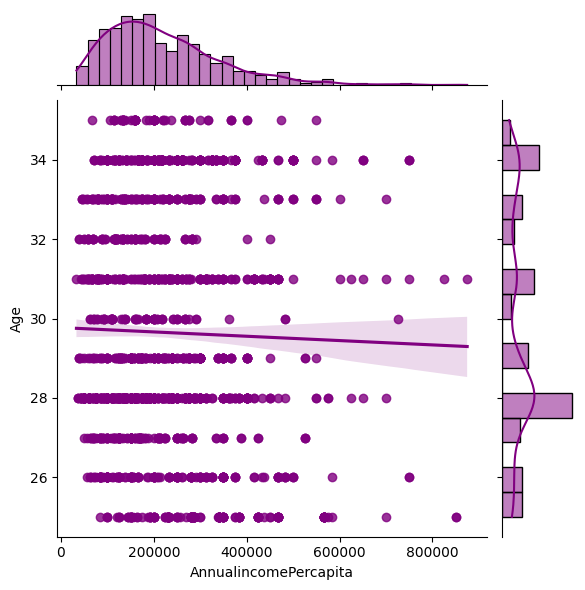

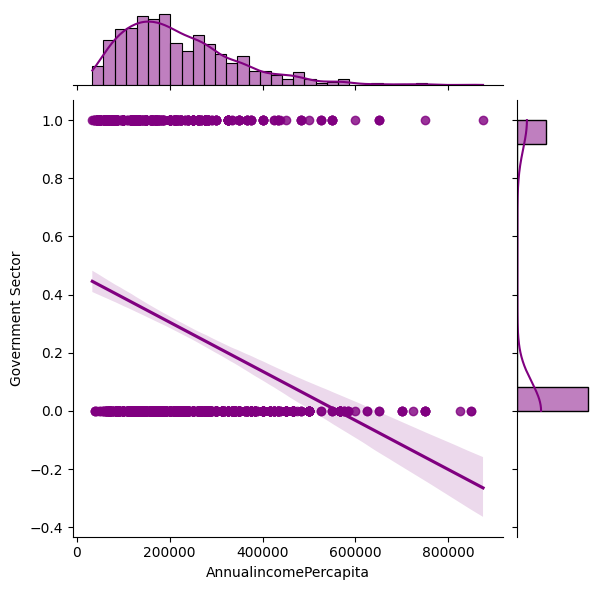

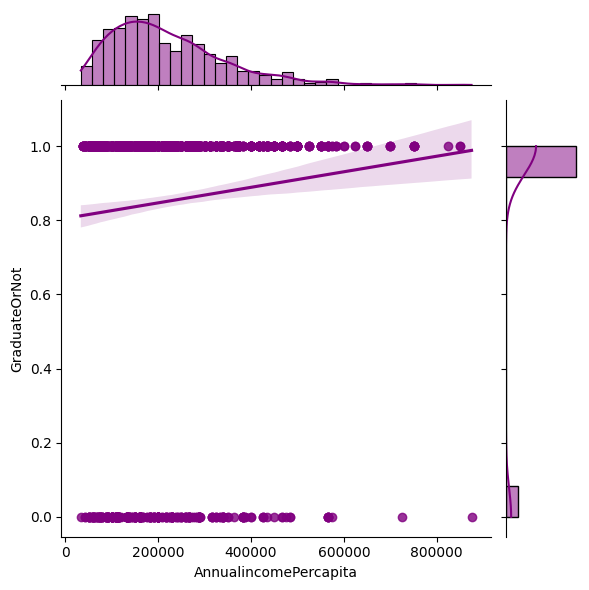

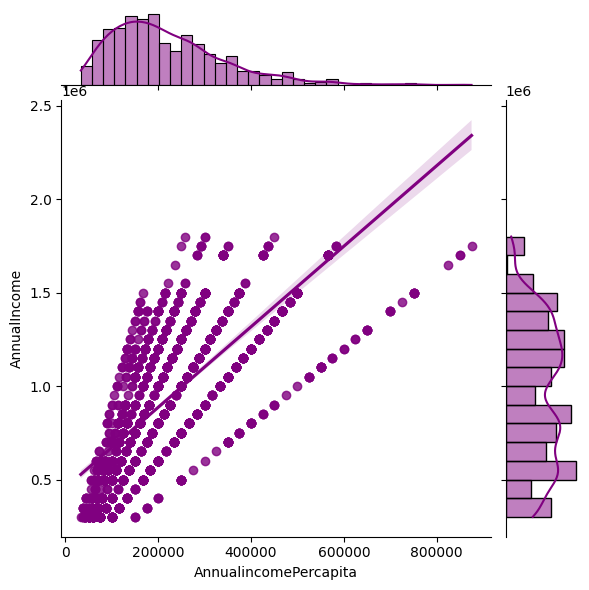

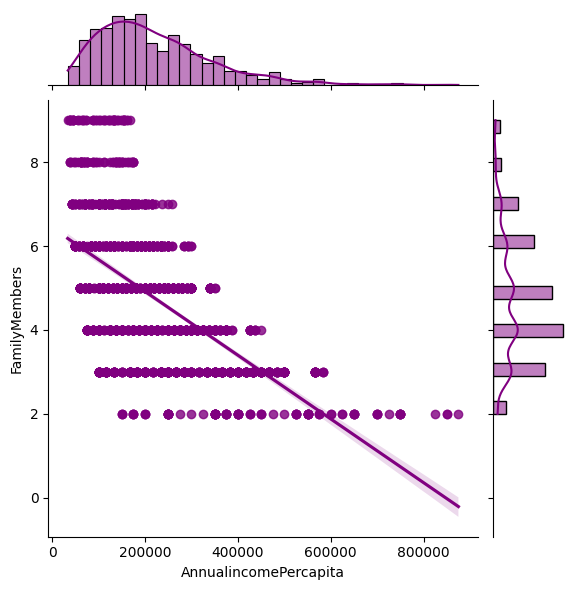

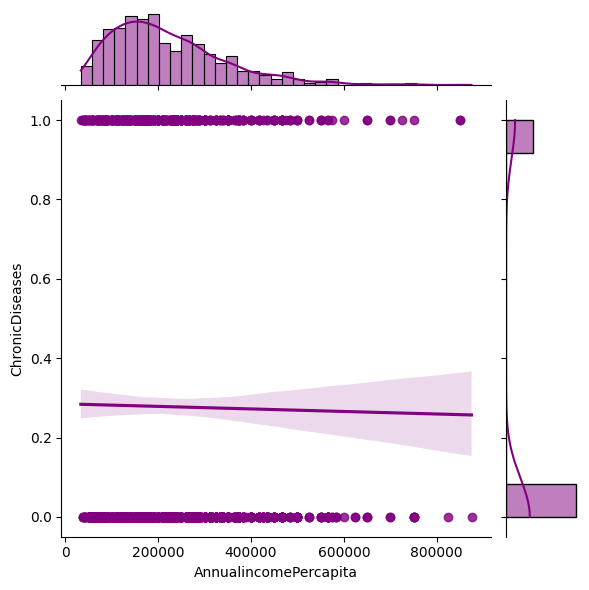

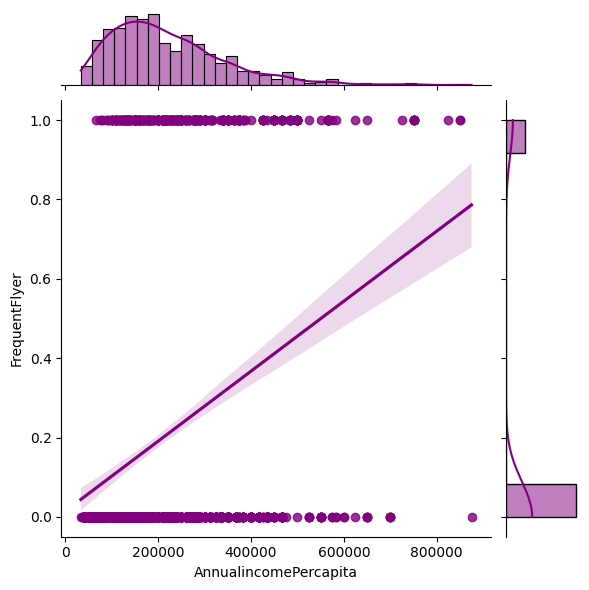

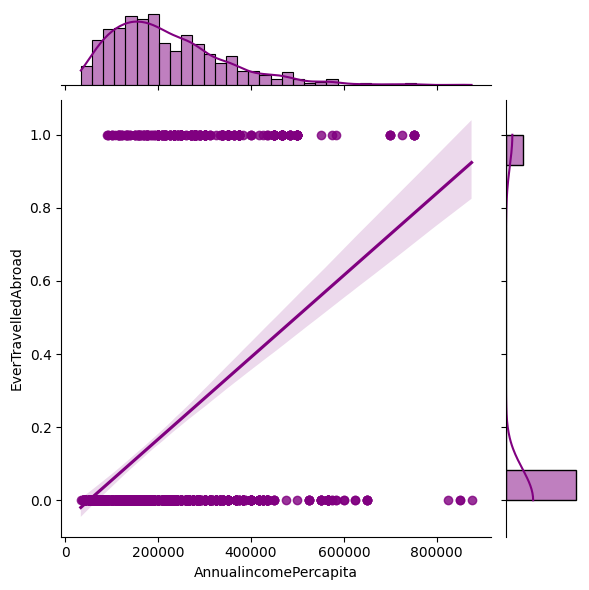

In [ ]:
#AnnualIncome
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de AnnualIncome con otras variables ==> \n")
rp=[]
rn=[]
for i in  df.columns:
    if i != 'AnnualincomePercapita' and i != 'TravelInsurance':
        print(f"Correlacion entre AnnualincomePercapita y {i} ==> ",df.corr().loc['AnnualincomePercapita'][i])
        if df.corr().loc['AnnualincomePercapita'][i]>0:
          rp.append(i)
        else:
          rn.append(i)
        sns.jointplot(x='AnnualincomePercapita',y=i,data=df,kind = 'reg',color = 'purple')
        plt.show()
print('Relaciones positivas: ', rp)
print('Relaciones negativas: ', rn)

**AnnualIncomePercapita:** *Existen relaciones positivas importantes con las variables Annualincome, FrequentFlyer y EverTravelledAboard, y negativas en las variables FamilyMembers y Government Sector.*

Relaciones positivas:  ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'AnnualincomePercapita']

Relaciones negativas:  ['Age', 'Government Sector', 'FamilyMembers', 'ChronicDiseases']

*De los resultados obtenidos por nuestros algoritmos podemos concluir que, si bien los 3 modelos generaron resultados de aceptables a buenos, el algoritmo de Árbol de decisión destaca por sobre el resto.
También podemos observar que los 3 algoritmos obtuvieron buenos resultados detectando a los clientes que no compran el seguro, pero no así para los clientes que si lo compran, esto puede deberse a un desbalance en nuestra variable target y será evaluado en futuras entregas.*


#Proximos Pasos

* Optimizar los modelos teniendo en cuenta los datos.
* Optimizar los modelos teniendo en cuenta sus hiperparametros.
* Evaluar los resultados obtenidos de entrenar diferentes algoritmos.
* Elección del mejor algoritmo a partir de criterios.


#Modelos de Clasificación

## Algoritmos Standard


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold


In [ ]:
#X = df.drop(columns=['TravelInsurance'])
#y = df['TravelInsurance']

###Feature Engineering

Continuando con el trabajo realizado en el Entregable 3, adjuntamos la tabla de accuracy de cada modelo: 

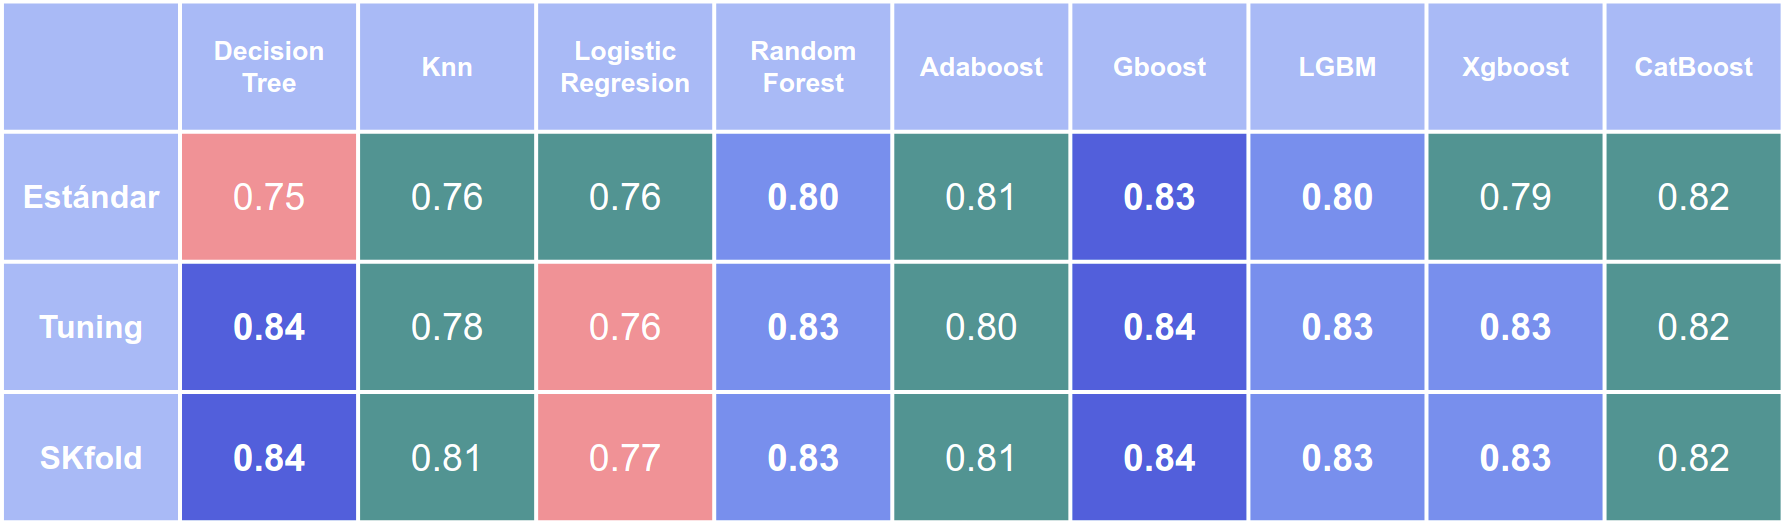

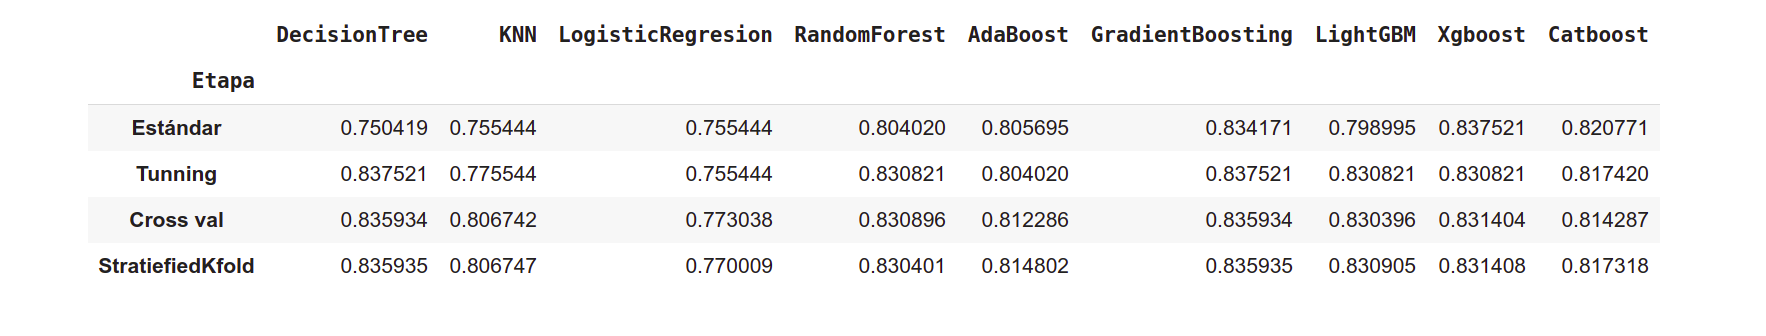

Basandonos en el analisis de importancias de cada modelo desarrollado en el Entregable 3 , llegamos a la conclusion de que existen algunas variables que no aportan al resultado de la clasificacion, a partir de lo cual se aplico un Feature Engineering donde se eliminaron basados en el criterio de:

* importancias_promedio_por_variable = (acc_modelos *  importancias_por_variable ) / cantidad_variables*

Siendo el acc_modelos el accuracy de cada modelo entrenado, utilizado como ponderacion de las importancias de las varibles.

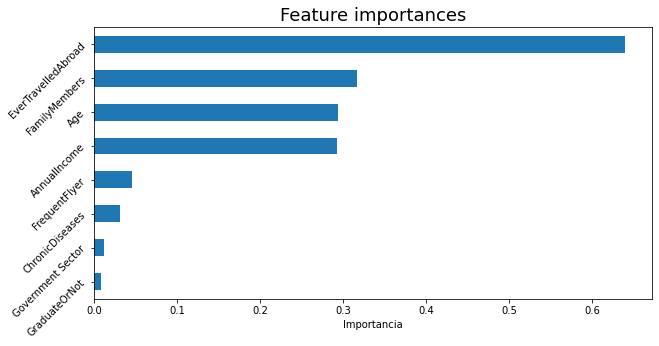

Podemos decir que las variables con poca importancia son :

'Government Sector','GraduateOrNot','FrequentFlyer', 'ChronicDiseases'

Las eliminaremos para realizar la clasificación.
Tambien eliminamos la variable creada 'AnnualincomePercapita', porque al evaluar de los algoritmos sin ella, los resultados no se vieron modificados, como podemos observar en la siguiente tabla que muestra los resultados para los algoritmos sin esta variable.

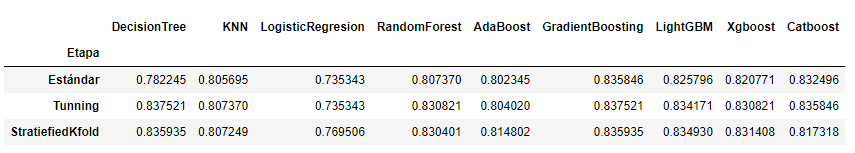

### Separo mis variable target del resto y luego divido mis datos en train y test para entrenar el algoritmo

In [ ]:
X = df.drop(columns=['TravelInsurance','AnnualincomePercapita','Government Sector','GraduateOrNot','FrequentFlyer', 'ChronicDiseases'])
y = df['TravelInsurance']

### Genero los algoritmos clasificadores

Utilizando lo trabajado en la Entrega 3 y con la finalidad de unificar los diferentes modelos y procedimientos, podemos resumir el codigo de la siguiente forma.

In [ ]:
# Generamos los algoritmos y repetimos el prodcedimiento anterior, agregando los parametros obtenidos con el GS Y EL RS

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import catboost as ctb
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=21)
log_reg = LogisticRegression(solver='newton-cg', penalty='l2',random_state=42)
randomforest = RandomForestClassifier(random_state=0,bootstrap=True, max_depth= 80,
                                      max_features= 2, min_samples_leaf= 5, min_samples_split= 8, n_estimators= 100)
ada = AdaBoostClassifier(n_estimators=4,learning_rate=1)
gbrt = GradientBoostingClassifier(random_state = 42,learning_rate= 0.01, max_depth= 3, n_estimators= 50)
lgb = lgb.LGBMClassifier(objective='binary',feature_fraction = 0.8, learning_rate =0.6, max_depth = 3, num_leaves= 4)
xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123,max_depth=3, min_child_weight=1)
catb = ctb.CatBoostClassifier(l2_leaf_reg = 10, max_depth = 4)

scores_train=[]
scores_test=[]
matrices = []
reportes = []

classifiers = [tree,knn,log_reg,randomforest,ada,gbrt,lgb,xgb,catb]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
std_x = StandardScaler()
X_train = std_x.fit_transform(X_train)
X_test = std_x.transform(X_test)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    ypred_train = cls.predict(X_train)
    ypred_test = cls.predict(X_test)
    acc_train= accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)
    matriz = confusion_matrix(y_test, ypred_test)
    report =classification_report(y_test, ypred_test)
    scores_train.append(acc_train)
    scores_test.append(acc_test)
    matrices.append(matriz)
    reportes.append(report)



0:	learn: 0.6789824	total: 47.1ms	remaining: 47.1s
1:	learn: 0.6660001	total: 47.7ms	remaining: 23.8s
2:	learn: 0.6534894	total: 48.2ms	remaining: 16s
3:	learn: 0.6417674	total: 49ms	remaining: 12.2s
4:	learn: 0.6312305	total: 50.2ms	remaining: 9.98s
5:	learn: 0.6213556	total: 51.1ms	remaining: 8.47s
6:	learn: 0.6123381	total: 52.1ms	remaining: 7.39s
7:	learn: 0.6044191	total: 53.1ms	remaining: 6.58s
8:	learn: 0.5946745	total: 54.1ms	remaining: 5.95s
9:	learn: 0.5850222	total: 55ms	remaining: 5.45s
10:	learn: 0.5760678	total: 56ms	remaining: 5.03s
11:	learn: 0.5705935	total: 56.9ms	remaining: 4.68s
12:	learn: 0.5650496	total: 57.8ms	remaining: 4.39s
13:	learn: 0.5569562	total: 58.8ms	remaining: 4.14s
14:	learn: 0.5502786	total: 59.7ms	remaining: 3.92s
15:	learn: 0.5459075	total: 60.7ms	remaining: 3.73s
16:	learn: 0.5417978	total: 61.5ms	remaining: 3.56s
17:	learn: 0.5350792	total: 62.4ms	remaining: 3.4s
18:	learn: 0.5309157	total: 63.4ms	remaining: 3.27s
19:	learn: 0.5267539	total: 64.

### Matriz de confusion para cada algoritmo

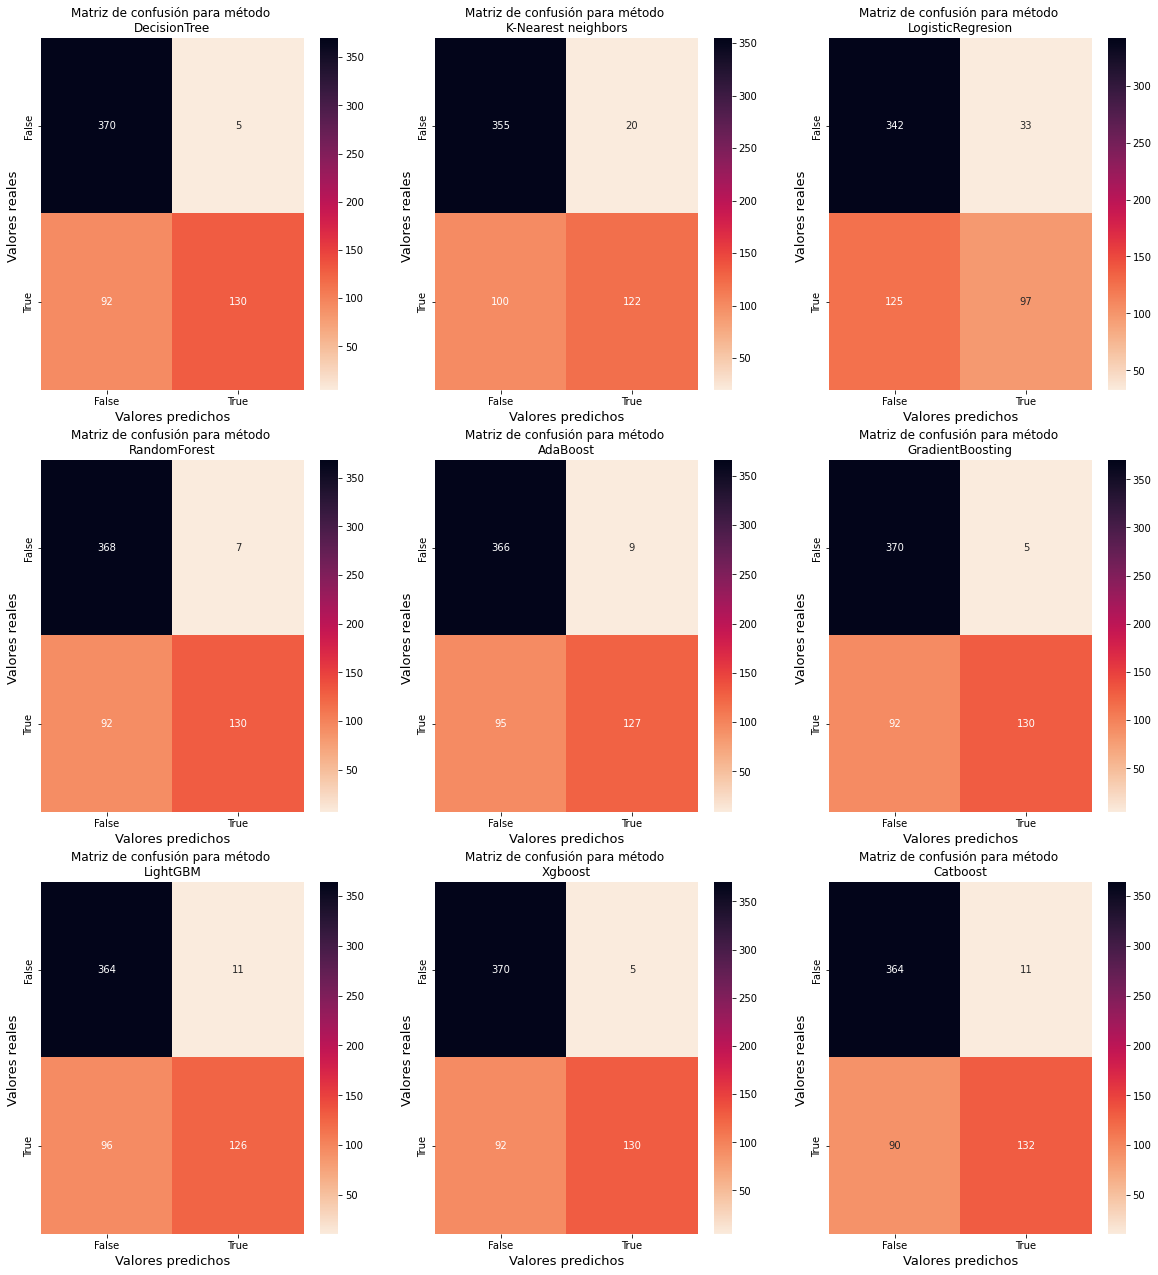

In [ ]:
labels = ['DecisionTree','K-Nearest neighbors', 'LogisticRegresion',
          'RandomForest','AdaBoost','GradientBoosting','LightGBM','Xgboost','Catboost']
ax = 0

fig, axes = plt.subplots(3,3,figsize=(20,22))
for l,n in zip(matrices,labels):
    
    sns.heatmap(l, annot=True, cmap='rocket_r', fmt='d', ax=axes.flat[ax])
    axes.flat[ax].set_title('Matriz de confusión para método \n'+n, fontdict={'fontsize':12});
    axes.flat[ax].set_xlabel('Valores predichos', fontdict={'fontsize':13})
    axes.flat[ax].set_ylabel('Valores reales ', fontdict={'fontsize':13});
    axes.flat[ax].xaxis.set_ticklabels(['False','True'])
    axes.flat[ax].yaxis.set_ticklabels(['False','True'])
    ax+=1

### Reportes de clasificación para los modelos

In [ ]:
for i,j in enumerate(labels):
    print('Reporte post GridSearch para: '+j)
    print(reportes[i])
    print('------------------------------------------------')
    print()

Reporte post GridSearch para: DecisionTree
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       375
           1       0.96      0.59      0.73       222

    accuracy                           0.84       597
   macro avg       0.88      0.79      0.81       597
weighted avg       0.86      0.84      0.83       597

------------------------------------------------

Reporte post GridSearch para: K-Nearest neighbors
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       375
           1       0.86      0.55      0.67       222

    accuracy                           0.80       597
   macro avg       0.82      0.75      0.76       597
weighted avg       0.81      0.80      0.79       597

------------------------------------------------

Reporte post GridSearch para: LogisticRegresion
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       

**DecisionTree:**  *Podemos observar una importante cantidad de falsos negativos repercutiendo en un Recall de 0.59, por el contrario existe una pequeña cantidad de falsos positivos, obteniendo un Precisión de 0.96, siendo la media armónica de 0.73 entre estos valores.
La exactitud del algoritmo alcanza un valor de 0.84.*


**KNN:** *En este gráfico podemos  observar un aumento en la cantidad de falsos negativos con respecto al algoritmo anterior, llevando a un Recall de 0.59, a su vez, también existe un aumento de falsos positivos, reduciendo la Precisión a 0.86, Siendo la media armónica de 0.67 entre estos valores.
La exactitud del algoritmo alcanza un valor de 0.80.*

**LogisticRegresion:** *Para este método observamos un mayor aumento de los falsos negativos, superando incluso a los verdaderos positivos, repercutiendo en un Recall de 0.44. Al mismo tiempo, los falsos positivos tienen un incremento considerable, llevando a una precisión de 0.75, Siendo la media armónica de 0.55 entre estos valores.
La exactitud del algoritmo alcanza un valor de 0.74.*

*De los resultados obtenidos por los 3 primeros algoritmos podemos concluir que, si bien generaron resultados de aceptables a buenos, el algoritmo de Árbol de decisión destaca por sobre el resto.
También podemos observar que los 3 algoritmos obtuvieron buenos resultados detectando a los clientes que no compran el seguro, pero no así para los clientes que si lo compran.*


*Podemos observar que el método de GradientBoosting y Xgboost son los de mejor accuracy con 0.84, igualando los resultados obtenidos por DecisionTree.*

### Comparación curvas ROC para cada método

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

0:	learn: 0.6789824	total: 1.05ms	remaining: 1.05s
1:	learn: 0.6660001	total: 1.8ms	remaining: 899ms
2:	learn: 0.6534894	total: 2.52ms	remaining: 839ms
3:	learn: 0.6417674	total: 3.55ms	remaining: 884ms
4:	learn: 0.6312305	total: 4.67ms	remaining: 930ms
5:	learn: 0.6213556	total: 5.67ms	remaining: 939ms
6:	learn: 0.6123381	total: 6.32ms	remaining: 896ms
7:	learn: 0.6044191	total: 6.95ms	remaining: 862ms
8:	learn: 0.5946745	total: 7.57ms	remaining: 833ms
9:	learn: 0.5850222	total: 8.21ms	remaining: 813ms
10:	learn: 0.5760678	total: 8.83ms	remaining: 794ms
11:	learn: 0.5705935	total: 9.44ms	remaining: 777ms
12:	learn: 0.5650496	total: 10.1ms	remaining: 764ms
13:	learn: 0.5569562	total: 10.7ms	remaining: 753ms
14:	learn: 0.5502786	total: 11.3ms	remaining: 743ms
15:	learn: 0.5459075	total: 12ms	remaining: 736ms
16:	learn: 0.5417978	total: 12.5ms	remaining: 724ms
17:	learn: 0.5350792	total: 13.1ms	remaining: 717ms
18:	learn: 0.5309157	total: 14.3ms	remaining: 739ms
19:	learn: 0.5267539	tota

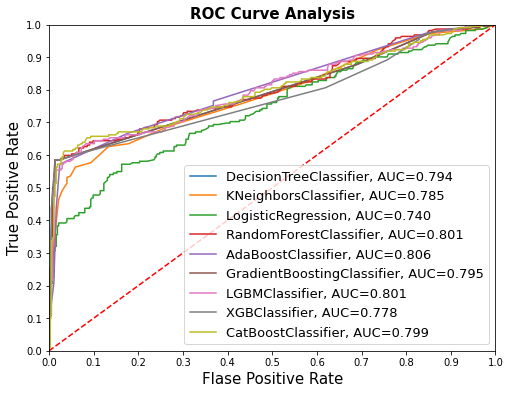

In [ ]:

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

*En las gráficas ROC anteriores podemos observar las curvas ROC respectivas a cada modelo de ML aplicado, y sus respectivos valores de AUC. Si bien, los 3 algoritmos obtuvieron valores que podrían considerarse buenos, el método del árbol de decisión toma la delantera con un valor para AUC de 0.79, mientras que para el algoritmo de regresión logística el valor disminuye a 0.74, que podría ser interpretado como un resultado regular.*


*Para las curvas ROC de boosting podemos ver algunos resultados interesantes. El mejor valor de AUC ahora lo obtiene AdaBoost, siendo los clasificadores con mayor accuracy (Xgboost y GradientBoost), los medianamente destacados del resto.*


# Validación cruzada con metodo 'StratifiedKfold'

In [ ]:
X2 = X.values
y2 = y.values

In [ ]:
def get_scores(model, X_train2,X_test2,y_train2, y_test2):
    model.fit(X_train2,y_train2)
    return model.score(X_test2,y_test2)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
tree_score=[]
knn_score=[]
rl_score=[]
rf_score =[]
skf_ada_score= []
skf_gb_score= []
skf_lgb_score= []
skf_xgb_score= []
skf_catb_score= []



for train_index, test_index in skf.split(X2,y2):
    X_train2,X_test2,y_train2, y_test2 = X2[train_index],X2[test_index],y2[train_index],y2[test_index]
    
    tree_score.append(get_scores(tree,X_train2,X_test2,y_train2,y_test2))
    knn_score.append(get_scores( knn,X_train2,X_test2,y_train2,y_test2))
    rl_score.append(get_scores( log_reg,X_train2,X_test2,y_train2,y_test2))
    rf_score.append(get_scores( log_reg,X_train2,X_test2,y_train2,y_test2))
    skf_ada_score.append(get_scores(ada,X_train2,X_test2,y_train2,y_test2))
    skf_gb_score.append(get_scores( gbrt,X_train2,X_test2,y_train2,y_test2))
    skf_lgb_score.append(get_scores( lgb,X_train2,X_test2,y_train2,y_test2))
    skf_xgb_score.append(get_scores( xgb,X_train2,X_test2,y_train2,y_test2))
    skf_catb_score.append(get_scores( catb,X_train2,X_test2,y_train2,y_test2))
    
skf_scores =pd.DataFrame({'tree scores': tree_score,'knn scores':knn_score,'RL scores':rl_score,
                         'RandomForest':rf_score,'AdaBoost':skf_ada_score,'GradiantBoost':skf_gb_score,
                         'LGBM':skf_lgb_score,'XGboost':skf_xgb_score,'CatBoost':skf_catb_score})

skf_scores

0:	learn: 0.6788290	total: 1ms	remaining: 1s
1:	learn: 0.6660473	total: 1.84ms	remaining: 916ms
2:	learn: 0.6546579	total: 2.6ms	remaining: 866ms
3:	learn: 0.6426364	total: 3.43ms	remaining: 853ms
4:	learn: 0.6321434	total: 4.24ms	remaining: 844ms
5:	learn: 0.6219378	total: 4.97ms	remaining: 824ms
6:	learn: 0.6128302	total: 5.97ms	remaining: 848ms
7:	learn: 0.6045955	total: 6.73ms	remaining: 835ms
8:	learn: 0.5953356	total: 7.5ms	remaining: 825ms
9:	learn: 0.5858385	total: 8.22ms	remaining: 814ms
10:	learn: 0.5765962	total: 9.31ms	remaining: 837ms
11:	learn: 0.5710153	total: 10.1ms	remaining: 831ms
12:	learn: 0.5654224	total: 10.9ms	remaining: 828ms
13:	learn: 0.5572993	total: 11.7ms	remaining: 825ms
14:	learn: 0.5500263	total: 12.6ms	remaining: 825ms
15:	learn: 0.5434422	total: 17.2ms	remaining: 1.05s
16:	learn: 0.5393653	total: 18.9ms	remaining: 1.09s
17:	learn: 0.5342548	total: 20ms	remaining: 1.09s
18:	learn: 0.5294436	total: 21.1ms	remaining: 1.09s
19:	learn: 0.5254497	total: 22.3

,tree scores,knn scores,RL scores,RandomForest,AdaBoost,GradiantBoost,LGBM,XGboost,CatBoost
0,0.841709,0.796482,0.756281,0.756281,0.836683,0.841709,0.826633,0.841709,0.824121
1,0.826633,0.796482,0.761307,0.761307,0.814070,0.826633,0.819095,0.826633,0.824121
2,0.843829,0.818640,0.748111,0.748111,0.833753,0.843829,0.838791,0.843829,0.828715
3,0.836272,0.793451,0.770781,0.770781,0.828715,0.836272,0.833753,0.836272,0.836272
4,0.831234,0.798489,0.758186,0.758186,0.826196,0.831234,0.831234,0.831234,0.831234


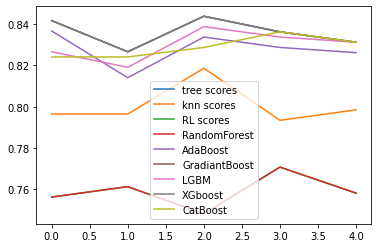

In [ ]:
skf_scores.plot.line()

## Tabla Scores totales

In [ ]:
cols = ['Etapa','DecisionTree','KNN','LogisticRegresion','RandomForest',
        'AdaBoost','GradientBoosting','LightGBM','Xgboost','Catboost']

score_totales = pd.DataFrame(columns=cols)
score_totales.set_index('Etapa', inplace=True)
score_totales.loc['Tunning']= scores_test
score_totales


,DecisionTree,KNN,LogisticRegresion,RandomForest,AdaBoost,GradientBoosting,LightGBM,Xgboost,Catboost
Etapa,,,,,,,,,
Tunning,0.837521,0.798995,0.735343,0.834171,0.825796,0.837521,0.820771,0.837521,0.830821


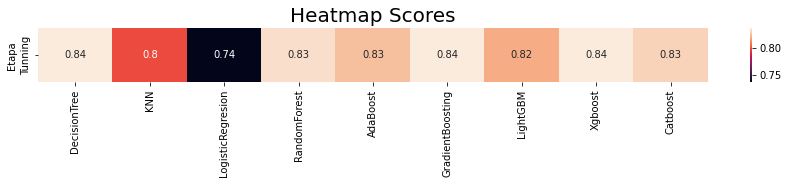

In [ ]:
plt.figure(figsize=(15,1))
sns.heatmap(score_totales, annot = True)
plt.title('Heatmap Scores', fontsize = 20)
plt.show()

<Figure size 720x360 with 0 Axes>

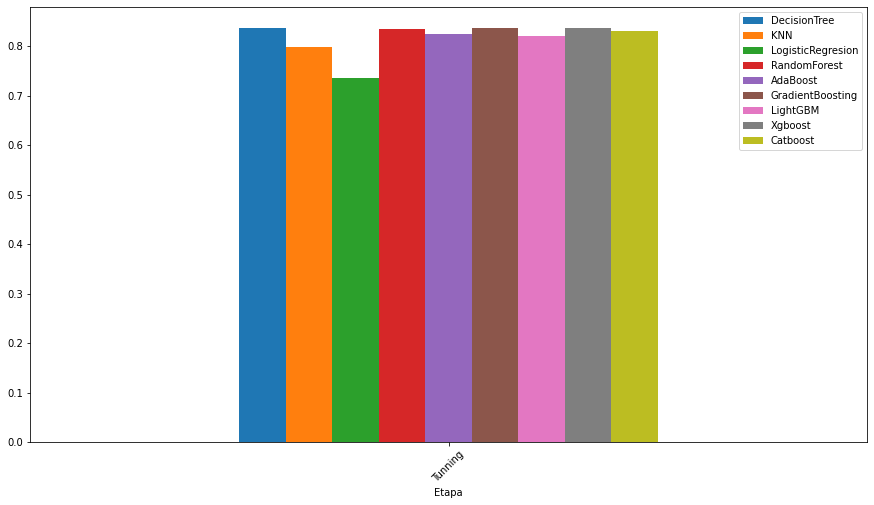

In [ ]:
plt.figure(figsize=(10,5))
score_totales.plot.bar(figsize=(15,8), rot=45)

*Sobre los resultados obtenidos, podemos afirmar que los mejores modelos de clasificación son el Arbol de Decision, GradientBoosting y XGBM. El modelo mas estable antes de realizar el tuning y posterior a el, es el GradientBoosting, no así con los anteriormente mencionados. 
Una caracteristica a tener en cuenta es que el GradientBoosting es el que mayor AUC tiene con respecto a los demas.*





### Importancia de las variables en los métodos

In [ ]:
tree_importances = pd.Series(tree.feature_importances_, index = X.columns)
log_importances = pd.Series(log_reg.coef_[0], index = X.columns)
forest_importances = pd.Series(randomforest.feature_importances_, index=X.columns)

In [ ]:

ada_importances =pd.Series(ada.feature_importances_, index = X.columns)
gbrt_importances = pd.Series(gbrt.feature_importances_, index = X.columns)
lgb_importances = pd.Series(lgb.feature_importances_, index = X.columns)
xgb_importances = xgb.feature_importances_
catb_importances = catb.feature_importances_

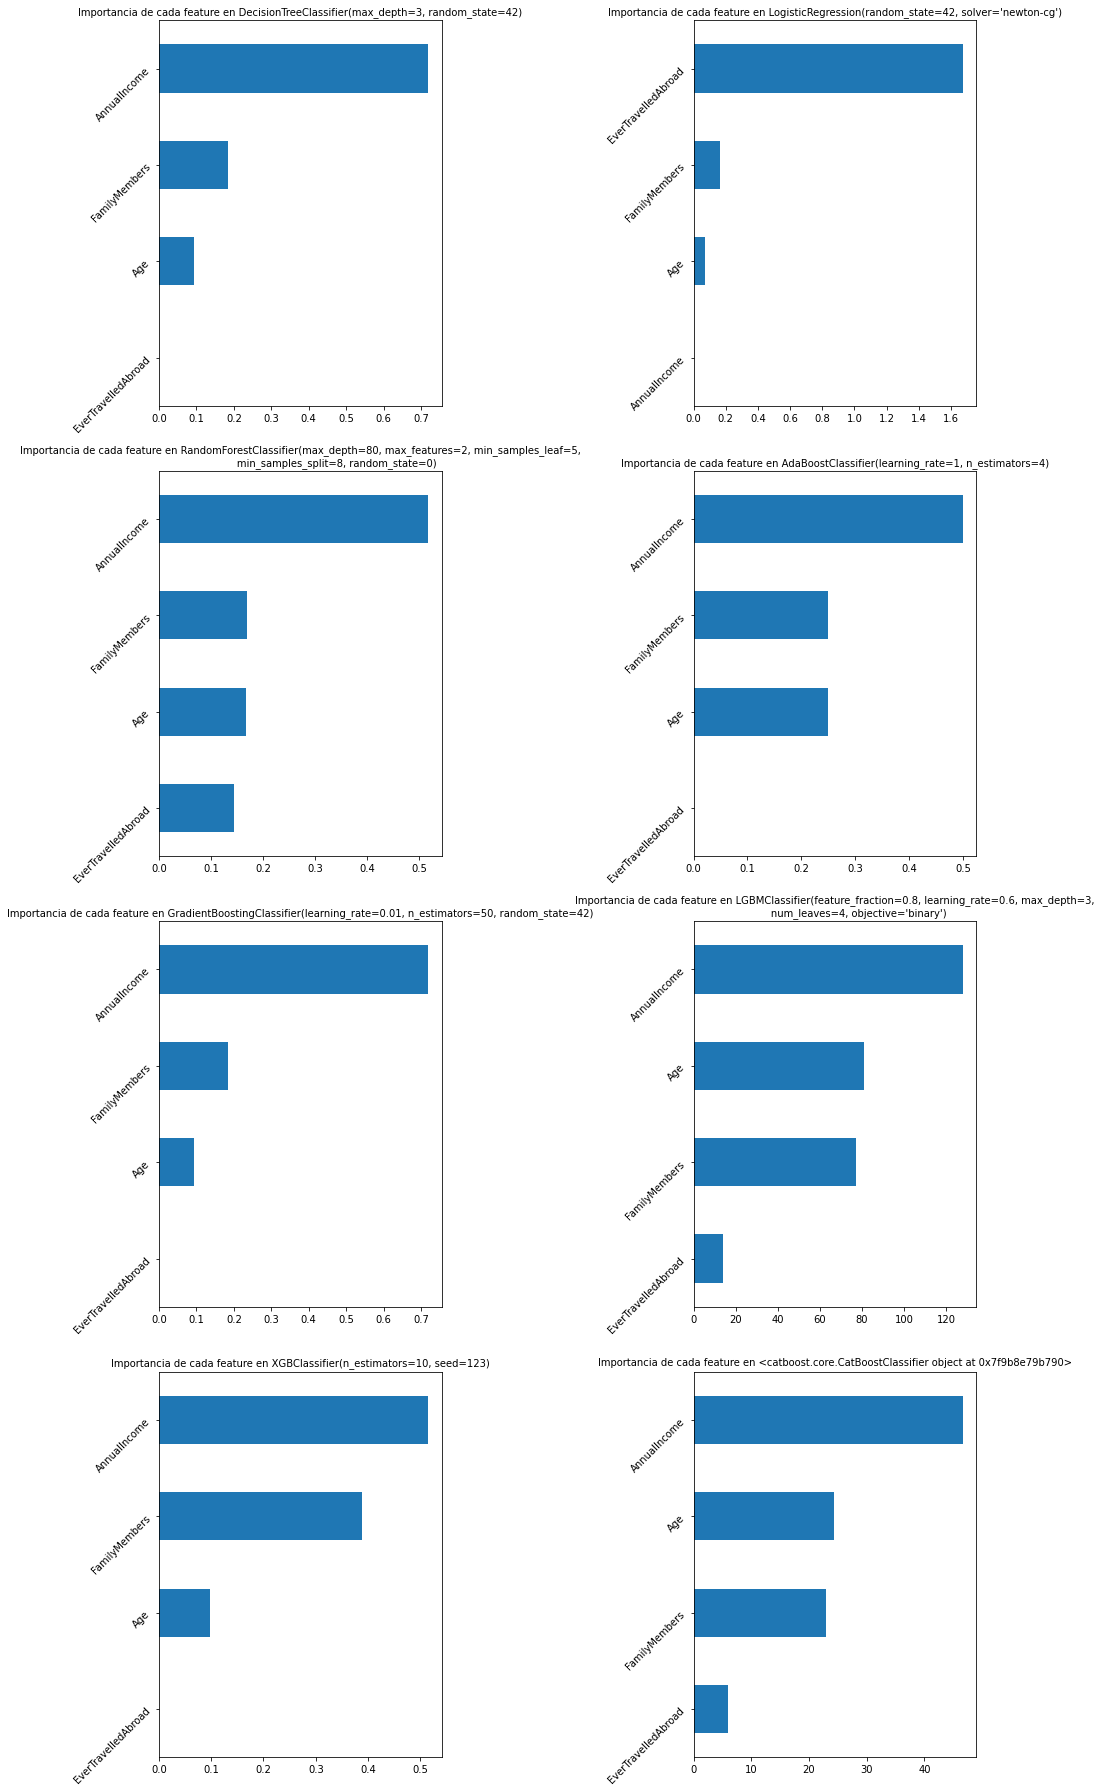

In [ ]:
imp = [tree,log_reg,randomforest,ada,gbrt,lgb,xgb,catb]
fig, axes = plt.subplots(4,2,figsize=(15,25))
ax=0
for i,j in enumerate(imp):
    if j != log_reg:
        coef = pd.Series(j.feature_importances_, index = X.columns)
    else:
        coef = pd.Series(j.coef_[0], index = X.columns)
    imp_coef = coef.sort_values()
    imp_coef.plot(kind = "barh", rot= 45, ax=axes.flat[ax])
    axes.flat[ax].set_title('Importancia de cada feature en {}'.format(j),fontdict={'fontsize':10})
    plt.tight_layout()
    ax+=1


In [ ]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())



importances = (score_totales['DecisionTree']['Tunning']* minmax_norm(tree_importances) + 
               score_totales['LogisticRegresion']['Tunning']* minmax_norm(log_importances) + 
               score_totales['RandomForest']['Tunning']* minmax_norm(forest_importances) + 
               score_totales['AdaBoost']['Tunning']* minmax_norm(ada_importances) + 
               score_totales['GradientBoosting']['Tunning']* minmax_norm(gbrt_importances) +
               score_totales['LightGBM']['Tunning']* minmax_norm(lgb_importances) +
               score_totales['Xgboost']['Tunning']* minmax_norm(xgb_importances) +
               score_totales['Catboost']['Tunning']* minmax_norm(catb_importances)) / 8
importances

Age                    0.215811
AnnualIncome           0.728015
FamilyMembers          0.299886
EverTravelledAbroad    0.091918
dtype: float64

Text(0.5, 0, 'Importancia')

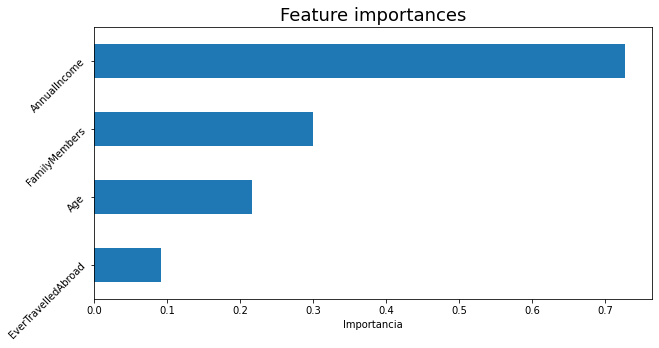

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
importances.sort_values().plot.barh(ax=ax, rot=45)
ax.set_title("Feature importances",fontdict={'fontsize': 18})
ax.set_xlabel("Importancia")


*Tras realizar la reduccion de la dimensionalidad de nuestro dataset, podemos observar que la variable con mas importancia promedio de los modelos es el AnnualIncome, reflejando la correlacion con la variable target mencionada en el EDA.*

*Los modelos al aplicar el feature engineering reduciendo la dimensionalidad, no modificaron demasiado sus metricas, lo cual da a entender que las variables eliminadas no se consideraron importantes ni mejoraron el resultado teniendo en cuenta el concepto de "Curse of dimensionality". Otra prueba realizada pero no documentada, tuvo que ver con aplicar algoritmos de reduccion de dimensionalidad, entre ellos PCA. Al parecer, reducir las componentes creadas basandonos en la varianza, empeoraba el accuracy de todos los modelos.*

*Sobre los modelos estudiados, podemos concluir que Arbol de Decision, GradientBoosting y XGBM son los que tienen mejores resultados en sus evaluaciones. Los tres tienen iguales metricas a excepcion del Gradient Boosting que es el de mayor AUC. Bajo esa metrica, que casi no se diferencia entre Arbol de Decision y GradientBoosting, elegimos como mejor modelo a Gradient Boosting.* 




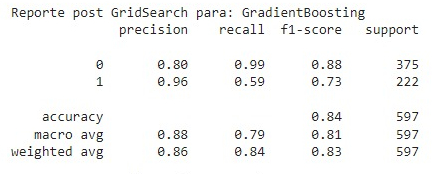

*Analizando sus metricas:* 

*Tenemos un porcentaje de acierto de predicciones positivas que fueron correctas de un 84%. Podemos afirmar o negar que un cliente contratará un seguro de viajes con una exactitud del 84%. El porcentaje de casos positivos detectados es de un 96%. 
El porcentaje de detectar correctamente si un cliente contratara el seguro entre todos los clientes es de un 59%.* 

*Bajo estas metricas, podemos concluir que el modelo desarrollado genera pocos falsos positivos pero pasa por alto una gran proporción de los potenciales compradores, es más eficiente minimizando las pérdidas que maximizando las ventas al ofrecer el seguro.*